# Compare areal extent from ODYSSEA to GLORYS and ERA5 data

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import dask
import dask.array as dsa
from xgcm import Grid
import xgcm 
from xgcm.autogenerate import generate_grid_ds
from xhistogram.xarray import histogram
#import regionate as reg

In [4]:
odyssea = xr.open_dataset('cmems_obs-sst_glo_phy_nrt_l4_P1D-m_1708716744766.nc', chunks={})

In [5]:
odyssea

<xarray.Dataset>
Dimensions:           (time: 185, latitude: 90, longitude: 280)
Coordinates:
  * latitude          (latitude) float32 22.05 22.15 22.25 ... 30.75 30.85 30.95
  * longitude         (longitude) float32 -99.95 -99.85 -99.75 ... -72.15 -72.05
  * time              (time) datetime64[ns] 2023-05-01 2023-05-02 ... 2023-11-01
Data variables:
    analysed_sst      (time, latitude, longitude) float32 dask.array<chunksize=(185, 90, 280), meta=np.ndarray>
    analysis_error    (time, latitude, longitude) float32 dask.array<chunksize=(185, 90, 280), meta=np.ndarray>
    mask              (time, latitude, longitude) float32 dask.array<chunksize=(185, 90, 280), meta=np.ndarray>
    sea_ice_fraction  (time, latitude, longitude) float32 dask.array<chunksize=(185, 90, 280), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.11
    title:             ODYSSEA Global Sea Surface Temperature Gridded Level 4...
    institution:       Institut Francais de Recherche pour l'Exploitation de ...
    source:            Odyssea L4 processor
    history:           Optimally interpolated SST originally produced by Ifre...
    contact:           emmanuelle.autret@ifremer.fr;jfpiolle@ifremer.fr
    references:        Product User Manual for L4 Odyssea Product over the Gl...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  SST_GLO_PHY_L4_NRT_010_043
    subset:datasetId:  cmems_obs-sst_glo_phy_nrt_l4_P1D-m_202303
    subset:date:       2024-02-23T19:32:24.767Z

In [6]:
odyssea.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 185, latitude: 90, longitude: 280)>
dask.array<open_dataset-analysed_sst, shape=(185, 90, 280), dtype=float32, chunksize=(185, 90, 280), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 22.05 22.15 22.25 22.35 ... 30.75 30.85 30.95
  * longitude  (longitude) float32 -99.95 -99.85 -99.75 ... -72.25 -72.15 -72.05
  * time       (time) datetime64[ns] 2023-05-01 2023-05-02 ... 2023-11-01
Attributes:
    units:          kelvin
    standard_name:  sea_surface_foundation_temperature
    long_name:      Analysed sea surface temperature

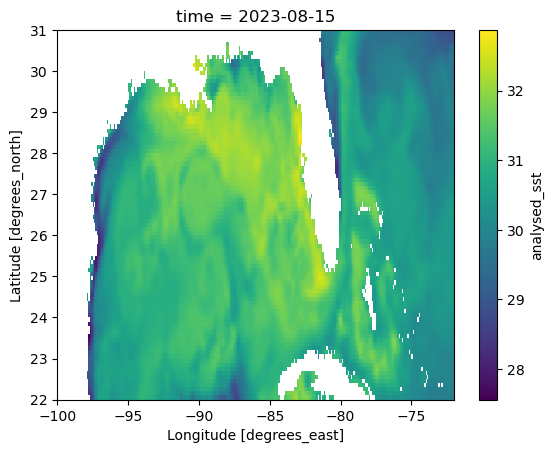

In [7]:
sst = odyssea.analysed_sst-273.15
sst.sel(time='2023-08-15', method='nearest').plot()

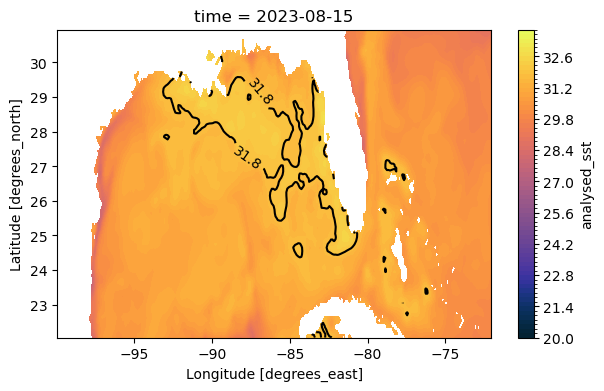

In [13]:
plt.figure(figsize=(7,4))
sst.sel(time='2023-08-15', method='nearest').plot.contourf(levels=np.arange(20, 34, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = sst.sel(time='2023-08-15', method='nearest').plot.contour(levels=[31.8], colors='k')
plt.clabel(c);

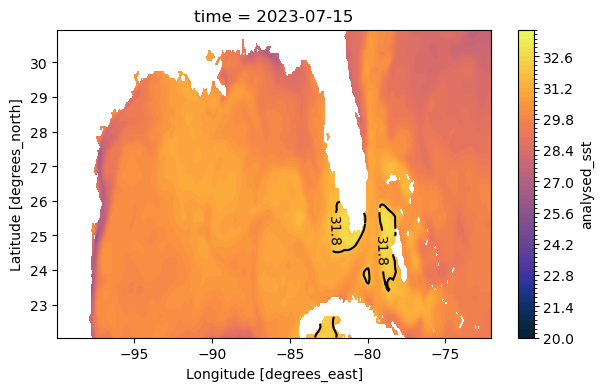

In [14]:
plt.figure(figsize=(7,4))
sst.sel(time='2023-07-15', method='nearest').plot.contourf(levels=np.arange(20, 34, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = sst.sel(time='2023-07-15', method='nearest').plot.contour(levels=[31.8], colors='k')
plt.clabel(c);

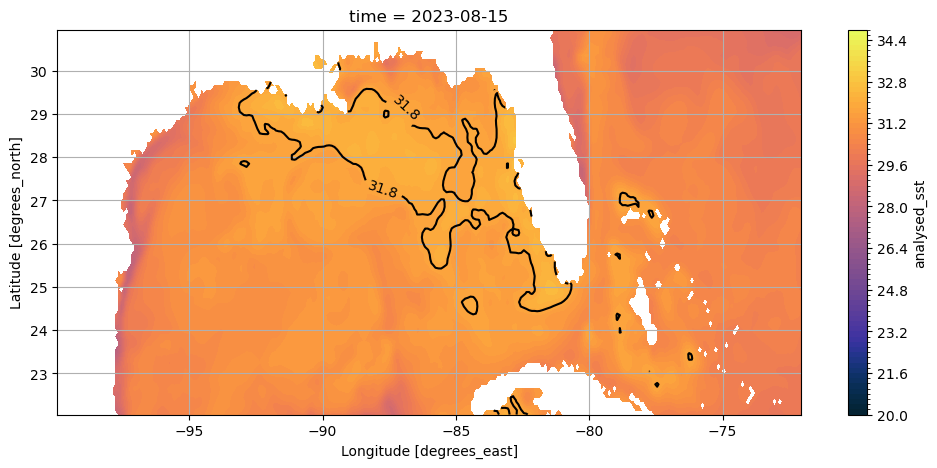

In [8]:
plt.figure(figsize=(12,5))

sst.sel(time='2023-08-15', method='nearest').plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = sst.sel(time='2023-08-15', method='nearest').plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
plt.grid();

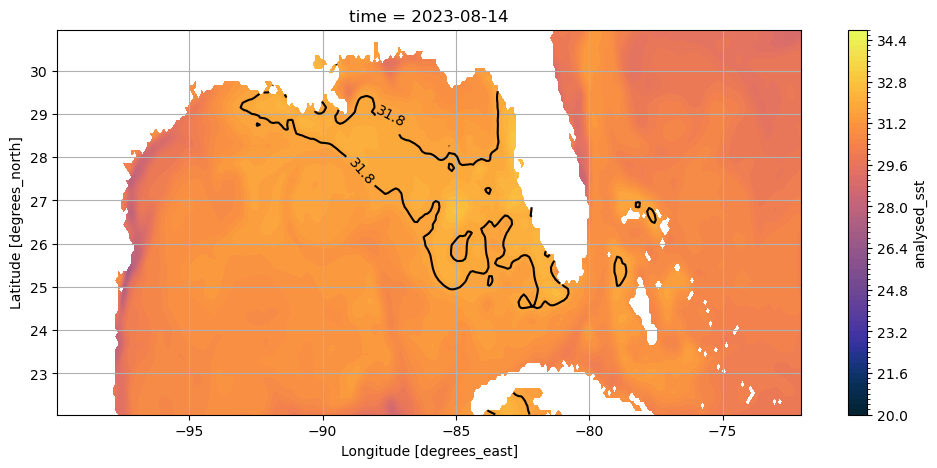

In [15]:
plt.figure(figsize=(12,5))

sst.sel(time='2023-08-14', method='nearest').plot.contourf(levels=np.arange(20, 35, 0.2), 
                                                           colors=cmocean.cm.thermal, add_colorbar=True)
c = sst.sel(time='2023-08-14', method='nearest').plot.contour(levels=[31.8], colors='k')
plt.clabel(c)
plt.grid();